In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_calendar = pd.read_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy\calendar.csv')
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
df_calendar.tail(20)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1949,2016-05-31,11618,Tuesday,4,5,2016,d_1950,NaN,NaN,NaN,NaN,0,0,0
1950,2016-06-01,11618,Wednesday,5,6,2016,d_1951,NaN,NaN,NaN,NaN,1,1,0
1951,2016-06-02,11618,Thursday,6,6,2016,d_1952,NBAFinalsStart,Sporting,NaN,NaN,1,0,1
1952,2016-06-03,11618,Friday,7,6,2016,d_1953,NaN,NaN,NaN,NaN,1,1,1
1953,2016-06-04,11619,Saturday,1,6,2016,d_1954,NaN,NaN,NaN,NaN,1,0,0
1954,2016-06-05,11619,Sunday,2,6,2016,d_1955,NaN,NaN,NaN,NaN,1,1,1
1955,2016-06-06,11619,Monday,3,6,2016,d_1956,NaN,NaN,NaN,NaN,1,1,1
1956,2016-06-07,11619,Tuesday,4,6,2016,d_1957,Ramadan starts,Religious,NaN,NaN,1,1,0
1957,2016-06-08,11619,Wednesday,5,6,2016,d_1958,NaN,NaN,NaN,NaN,1,0,1
1958,2016-06-09,11619,Thursday,6,6,2016,d_1959,NaN,NaN,NaN,NaN,1,1,1


In [6]:
df_calendar.loc[df_calendar['wm_yr_wk'] == 11421]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1239,2014-06-21,11421,Saturday,1,6,2014,d_1240,NaN,NaN,NaN,NaN,0,0,0
1240,2014-06-22,11421,Sunday,2,6,2014,d_1241,NaN,NaN,NaN,NaN,0,0,0
1241,2014-06-23,11421,Monday,3,6,2014,d_1242,NaN,NaN,NaN,NaN,0,0,0
1242,2014-06-24,11421,Tuesday,4,6,2014,d_1243,NaN,NaN,NaN,NaN,0,0,0
1243,2014-06-25,11421,Wednesday,5,6,2014,d_1244,NaN,NaN,NaN,NaN,0,0,0
1244,2014-06-26,11421,Thursday,6,6,2014,d_1245,NaN,NaN,NaN,NaN,0,0,0
1245,2014-06-27,11421,Friday,7,6,2014,d_1246,NaN,NaN,NaN,NaN,0,0,0


In [3]:
# build a list for special days
df_special_days = df_calendar.copy().dropna(subset=['event_name_1','event_type_1','event_name_2','event_type_2'], 
                                     how='all')
df_special_days.head(20)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
16,2011-02-14,11103,Monday,3,2,2011,d_17,ValentinesDay,Cultural,NaN,NaN,0,0,1
23,2011-02-21,11104,Monday,3,2,2011,d_24,PresidentsDay,National,NaN,NaN,0,0,0
39,2011-03-09,11106,Wednesday,5,3,2011,d_40,LentStart,Religious,NaN,NaN,1,1,1
46,2011-03-16,11107,Wednesday,5,3,2011,d_47,LentWeek2,Religious,NaN,NaN,0,0,0
47,2011-03-17,11107,Thursday,6,3,2011,d_48,StPatricksDay,Cultural,NaN,NaN,0,0,0
50,2011-03-20,11108,Sunday,2,3,2011,d_51,Purim End,Religious,NaN,NaN,0,0,0
85,2011-04-24,11113,Sunday,2,4,2011,d_86,OrthodoxEaster,Religious,Easter,Cultural,0,0,0
87,2011-04-26,11113,Tuesday,4,4,2011,d_88,Pesach End,Religious,NaN,NaN,0,0,0
96,2011-05-05,11114,Thursday,6,5,2011,d_97,Cinco De Mayo,Cultural,NaN,NaN,1,1,1


In [4]:
two_events_day = df_calendar[df_calendar['event_name_2'].notnull()]
two_events_day

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
85,2011-04-24,11113,Sunday,2,4,2011,d_86,OrthodoxEaster,Religious,Easter,Cultural,0,0,0
827,2013-05-05,11315,Sunday,2,5,2013,d_828,OrthodoxEaster,Religious,Cinco De Mayo,Cultural,1,1,1
1177,2014-04-20,11412,Sunday,2,4,2014,d_1178,Easter,Cultural,OrthodoxEaster,Religious,0,0,0
1233,2014-06-15,11420,Sunday,2,6,2014,d_1234,NBAFinalsEnd,Sporting,Father's day,Cultural,0,1,1
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


## Ideas
* The event_name_2 is the other event happended in the same day of event_1, only 5 days, I may just ignore event_2 for now.
* There are 4 combinations of calendar data : snap + event, no snap + no event, snap + no event, no snap + event.
* I think I need to category the date for different combinations.

In [5]:
df_calendar_CA = df_calendar.iloc[:,:-2].copy()
df_calendar_CA['snap_CA_type'] = 0
df_calendar_CA.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_CA_type
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0


In [6]:
# category the date by snap_type

# CA no snap + no event , snap_type = 0

# CA snap + event = 1
df_calendar_CA.loc[(df_calendar_CA['event_name_1'].notnull()) 
                   & (df_calendar_CA['snap_CA'] == 1), 'snap_CA_type'] = 1

# # CA snap + no event = 2
df_calendar_CA.loc[(df_calendar_CA['event_name_1'].isnull()) 
                   & (df_calendar_CA['snap_CA'] == 1), 'snap_CA_type'] = 2

# # CA no snap + event = 3
df_calendar_CA.loc[(df_calendar_CA['event_name_1'].notnull()) 
                   & (df_calendar_CA['snap_CA'] == 0), 'snap_CA_type'] = 3

In [7]:
df_calendar_CA['snap_CA_type'].value_counts()

0    1214
2     593
3     105
1      57
Name: snap_CA_type, dtype: int64

In [8]:
dateparse = lambda dates: pd.datetime.strtime(dates,'%Y-%m-%d')
date = pd.DataFrame(df_calendar[['date']])

(-1, 4)

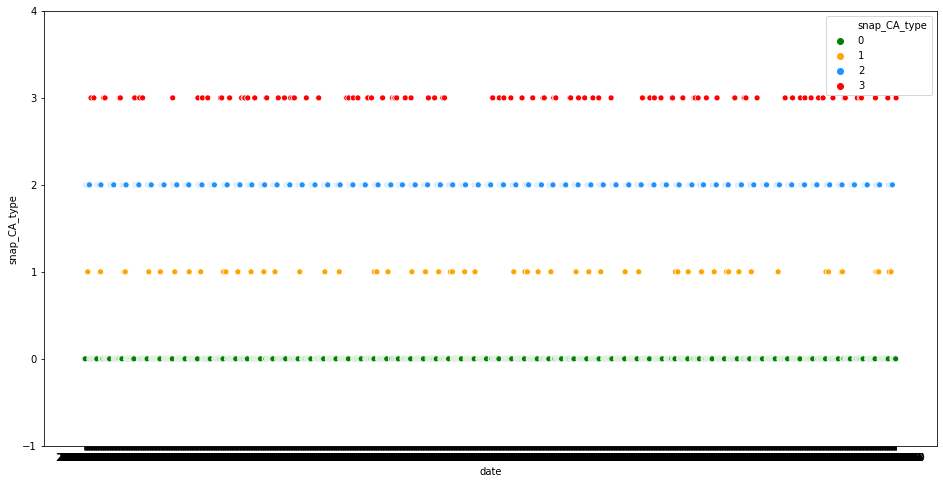

In [9]:
# plot the CA data
fig, ax = plt.subplots(figsize= (16,8))

f1 = sns.scatterplot(x = 'date', y = 'snap_CA_type', data = df_calendar_CA, ax = ax, 
                     hue='snap_CA_type', palette=['green','orange','dodgerblue','red'])
ax.set_ylim(-1,4)

In [10]:
# weekend and weekday

# CA no snap + no event + weekend = 4
df_calendar_CA.loc[(df_calendar_CA['event_name_1'].isnull()) 
                   & (df_calendar_CA['snap_CA'] == 0) 
                   & (df_calendar_CA['snap_CA_type'] == 0)
                   & ((df_calendar_CA['weekday'] == 'Saturday') | (df_calendar_CA['weekday'] =='Sunday'))
                   , 'snap_CA_type'] = 4

# CA snap + event + + weekend = 5
df_calendar_CA.loc[(df_calendar_CA['event_name_1'].notnull()) 
                   & (df_calendar_CA['snap_CA'] == 1) 
                   & (df_calendar_CA['snap_CA_type'] == 1)
                   & ((df_calendar_CA['weekday'] == 'Saturday') | (df_calendar_CA['weekday'] =='Sunday'))
                   , 'snap_CA_type'] = 5

# CA snap + no event + weekend = 6
df_calendar_CA.loc[(df_calendar_CA['event_name_1'].isnull()) 
                   & (df_calendar_CA['snap_CA'] == 1) 
                   & (df_calendar_CA['snap_CA_type'] == 2)
                   & ((df_calendar_CA['weekday'] == 'Saturday') | (df_calendar_CA['weekday'] =='Sunday'))
                   , 'snap_CA_type'] = 6

# CA no snap + event + weekend = 7
df_calendar_CA.loc[(df_calendar_CA['event_name_1'].notnull()) 
                   & (df_calendar_CA['snap_CA'] == 0)
                   & (df_calendar_CA['snap_CA_type'] == 3)
                   & ((df_calendar_CA['weekday'] == 'Saturday') | (df_calendar_CA['weekday'] =='Sunday'))
                   , 'snap_CA_type'] = 7


In [11]:
df_calendar_CA['snap_CA_type'].value_counts()

0    868
2    426
4    346
6    167
3     72
1     39
7     33
5     18
Name: snap_CA_type, dtype: int64

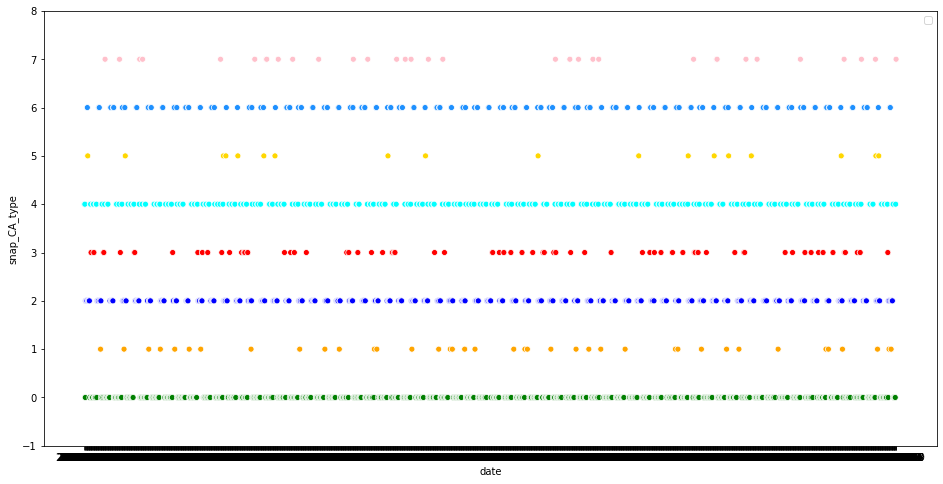

In [12]:
fig, ax = plt.subplots(figsize= (16,8))

f2 = sns.scatterplot(x = 'date', y = 'snap_CA_type', data = df_calendar_CA, ax = ax, 
                     hue='snap_CA_type', 
                     palette = ['green','orange','blue','red','cyan','gold','dodgerblue','pink'] )
ax.set_ylim(-1,8)
ax.legend("")

In [13]:
# TX data
df_calendar_TX = df_calendar.copy().drop(['snap_CA','snap_WI'],axis = 1)
df_calendar_TX['snap_TX_type'] = 0
df_calendar_TX.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,snap_TX_type
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,0,0


In [14]:
# TX no snap + no event = 0

# TX snap + event = 1
df_calendar_TX.loc[(df_calendar_TX['event_name_1'].notnull()) 
                   & (df_calendar_TX['snap_TX'] == 1), 'snap_TX_type'] = 1

# TX snap + no event = 2
df_calendar_TX.loc[(df_calendar_TX['event_name_1'].isnull()) 
                   & (df_calendar_TX['snap_TX'] == 1), 'snap_TX_type'] = 2

# TX no snap + event = 3
df_calendar_TX.loc[(df_calendar_TX['event_name_1'].notnull()) 
                   & (df_calendar_TX['snap_TX'] == 0), 'snap_TX_type'] = 3

# weekend and weekday

# TX no snap + no event + weekend = 4
df_calendar_TX.loc[(df_calendar_TX['event_name_1'].isnull()) 
                   & (df_calendar_TX['snap_TX'] == 0) 
                   & (df_calendar_TX['snap_TX_type'] == 0)
                   & ((df_calendar_TX['weekday'] == 'Saturday') | (df_calendar_TX['weekday'] =='Sunday'))
                   , 'snap_TX_type'] = 4

# TX snap + event + + weekend = 5
df_calendar_TX.loc[(df_calendar_TX['event_name_1'].notnull()) 
                   & (df_calendar_TX['snap_TX'] == 1) 
                   & (df_calendar_TX['snap_TX_type'] == 1)
                   & ((df_calendar_TX['weekday'] == 'Saturday') | (df_calendar_TX['weekday'] =='Sunday'))
                   , 'snap_TX_type'] = 5

# TX snap + no event + weekend = 6
df_calendar_TX.loc[(df_calendar_TX['event_name_1'].isnull()) 
                   & (df_calendar_TX['snap_TX'] == 1) 
                   & (df_calendar_TX['snap_TX_type'] == 2)
                   & ((df_calendar_TX['weekday'] == 'Saturday') | (df_calendar_TX['weekday'] =='Sunday'))
                   , 'snap_TX_type'] = 6

# TX no snap + event + weekend = 7
df_calendar_TX.loc[(df_calendar_TX['event_name_1'].notnull()) 
                   & (df_calendar_TX['snap_TX'] == 0)
                   & (df_calendar_TX['snap_TX_type'] == 3)
                   & ((df_calendar_TX['weekday'] == 'Saturday') | (df_calendar_TX['weekday'] =='Sunday'))
                   , 'snap_TX_type'] = 7

In [15]:
df_calendar_TX['snap_TX_type'].value_counts()

0    869
2    425
4    345
6    168
3     74
1     37
7     31
5     20
Name: snap_TX_type, dtype: int64

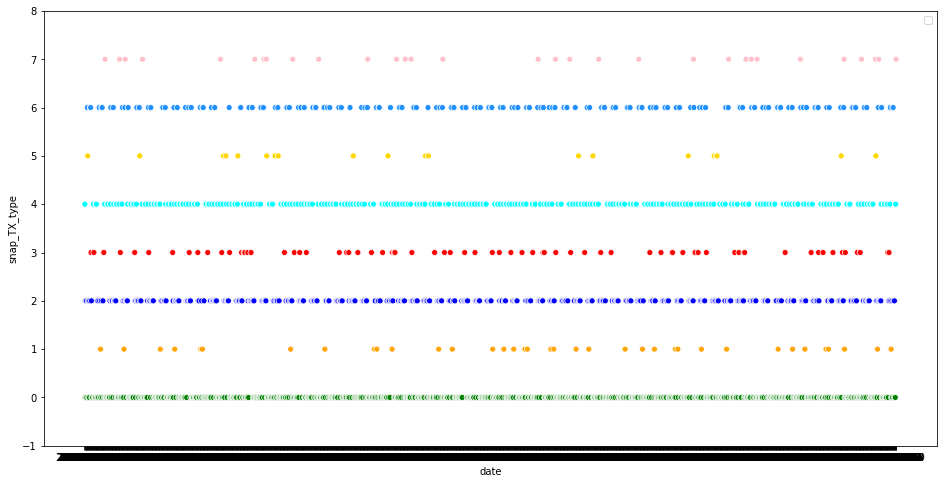

In [16]:
fig, ax = plt.subplots(figsize= (16,8))

f3 = sns.scatterplot(x = 'date', y = 'snap_TX_type', data = df_calendar_TX, ax = ax, 
                     hue='snap_TX_type', 
                     palette = ['green','orange','blue','red','cyan','gold','dodgerblue','pink'] )
ax.set_ylim(-1,8)
ax.legend("")

In [17]:
# WI data
df_calendar_WI = df_calendar.copy().drop(['snap_CA','snap_TX'],axis = 1)
df_calendar_WI['snap_WI_type'] = 0
df_calendar_WI.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_WI,snap_WI_type
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,0,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0


In [18]:
# WI no snap + no event = 0

# WI snap + event = 1
df_calendar_WI.loc[(df_calendar_WI['event_name_1'].notnull()) 
                   & (df_calendar_WI['snap_WI'] == 1), 'snap_WI_type'] = 1

# WI snap + no event = 2
df_calendar_WI.loc[(df_calendar_WI['event_name_1'].isnull()) 
                   & (df_calendar_WI['snap_WI'] == 1), 'snap_WI_type'] = 2

# WI no snap + event = 3
df_calendar_WI.loc[(df_calendar_WI['event_name_1'].notnull()) 
                   & (df_calendar_WI['snap_WI'] == 0), 'snap_WI_type'] = 3

# weekend and weekday

# WI no snap + no event + weekend = 4
df_calendar_WI.loc[(df_calendar_WI['event_name_1'].isnull()) 
                   & (df_calendar_WI['snap_WI'] == 0) 
                   & (df_calendar_WI['snap_WI_type'] == 0)
                   & ((df_calendar_WI['weekday'] == 'Saturday') | (df_calendar_WI['weekday'] =='Sunday'))
                   , 'snap_WI_type'] = 4

# WI snap + event + + weekend = 5
df_calendar_WI.loc[(df_calendar_WI['event_name_1'].notnull()) 
                   & (df_calendar_WI['snap_WI'] == 1) 
                   & (df_calendar_WI['snap_WI_type'] == 1)
                   & ((df_calendar_WI['weekday'] == 'Saturday') | (df_calendar_WI['weekday'] =='Sunday'))
                   , 'snap_WI_type'] = 5

# WI snap + no event + weekend = 6
df_calendar_WI.loc[(df_calendar_WI['event_name_1'].isnull()) 
                   & (df_calendar_WI['snap_WI'] == 1) 
                   & (df_calendar_WI['snap_WI_type'] == 2)
                   & ((df_calendar_WI['weekday'] == 'Saturday') | (df_calendar_WI['weekday'] =='Sunday'))
                   , 'snap_WI_type'] = 6

# WI no snap + event + weekend = 7
df_calendar_WI.loc[(df_calendar_WI['event_name_1'].notnull()) 
                   & (df_calendar_WI['snap_WI'] == 0)
                   & (df_calendar_WI['snap_WI_type'] == 3)
                   & ((df_calendar_WI['weekday'] == 'Saturday') | (df_calendar_WI['weekday'] =='Sunday'))
                   , 'snap_WI_type'] = 7

In [19]:
df_calendar_WI['snap_WI_type'].value_counts()

0    865
2    429
4    347
6    166
3     77
1     34
7     30
5     21
Name: snap_WI_type, dtype: int64

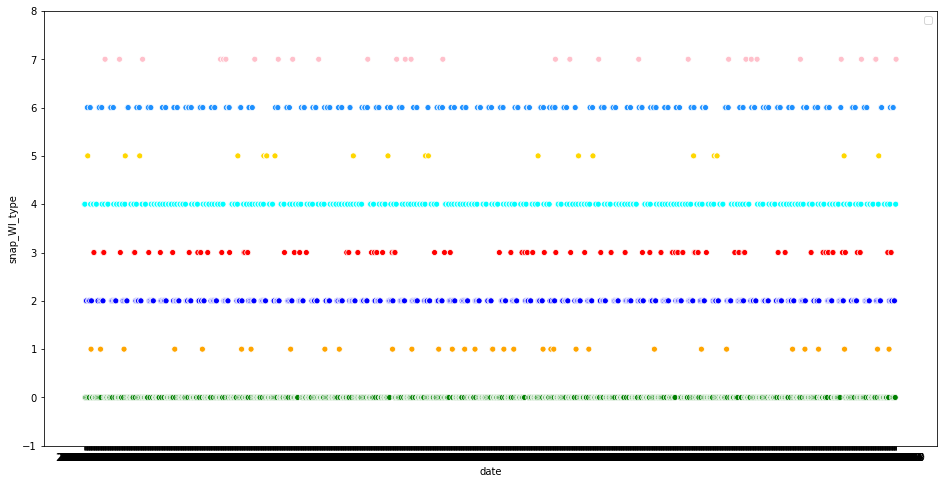

In [20]:
fig, ax = plt.subplots(figsize= (16,8))

f4 = sns.scatterplot(x = 'date', y = 'snap_WI_type', data = df_calendar_WI, ax = ax, 
                     hue='snap_WI_type', 
                     palette = ['green','orange','blue','red','cyan','gold','dodgerblue','pink'] )
ax.set_ylim(-1,8)
ax.legend("")

In [21]:
df_calendar_Sum = df_calendar.iloc[:,:9].copy()
df_calendar_Sum['CA'] = df_calendar_CA['snap_CA_type']
df_calendar_Sum['TX'] = df_calendar_TX['snap_TX_type']
df_calendar_Sum['WI'] = df_calendar_WI['snap_WI_type']

In [22]:
df_calendar_Sum.head(14)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,CA,TX,WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,4,4,4
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,4,4,4
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,2,2,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,2,0,2
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,2,2,2
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,2,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,6,6,6
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,5,5,5
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,2,2,0


In [23]:
# no snap + no event = 0
# snap + event = 1
# snap + no event = 2
# no snap + event = 3
# no snap + no event + weekend = 4
# snap + event + + weekend = 5
# snap + no event + weekend = 6
# no snap + event + weekend = 7
df_calendar_Sum.to_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy\calendar_2.csv',index = False)